In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
plt.style.use('seaborn')

In [4]:
os.path.exists('../datasets/50_Startups.csv')

True

In [5]:
df = pd.read_csv('../datasets/50_Startups.csv')

In [6]:
# checking if some fields are empty
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
state_enc = OneHotEncoder(drop='first')
state_df  = pd.DataFrame(state_enc.fit_transform(df[['State']]).toarray(),columns=['state_1','state_2'])

In [9]:
df = pd.concat([state_df,df],axis=1)
df.drop(['State'],inplace=True,axis=1)

In [10]:
# cleaned
df

,state_1,state_2,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,166187.94
5,0.0,1.0,131876.90,99814.71,362861.36,156991.12
6,0.0,0.0,134615.46,147198.87,127716.82,156122.51
7,1.0,0.0,130298.13,145530.06,323876.68,155752.60
8,0.0,1.0,120542.52,148718.95,311613.29,152211.77
9,0.0,0.0,123334.88,108679.17,304981.62,149759.96


# Impletementing Multiple Linear regression
- divide into X and y
- split into training and testing
- fit the algo
- test algo
- predict
- visualize

In [11]:
df.columns.tolist()

['state_1',
 'state_2',
 'R&D Spend',
 'Administration',
 'Marketing Spend',
 'Profit']

In [12]:
X = df[['state_1', 'state_2', 'R&D Spend', 'Administration', 'Marketing Spend',]]
y = df['Profit']

In [13]:
# scale the values in X
scalerX = StandardScaler()
x = scalerX.fit_transform(X)
print(x[:10]) # first 10 rows

[[-0.68599434  1.39326109  2.01641149  0.56075291  2.15394309]
 [-0.68599434 -0.71774056  1.95586034  1.08280658  1.9236004 ]
 [ 1.45773797 -0.71774056  1.75436374 -0.72825703  1.62652767]
 [-0.68599434  1.39326109  1.55478369 -0.09636463  1.42221024]
 [ 1.45773797 -0.71774056  1.5049372  -1.07991935  1.28152771]
 [-0.68599434  1.39326109  1.27980001 -0.77623907  1.25421046]
 [-0.68599434 -0.71774056  1.34006641  0.93214721 -0.68814993]
 [ 1.45773797 -0.71774056  1.24505666  0.87198001  0.93218598]
 [-0.68599434  1.39326109  1.03036886  0.9869521   0.83088691]
 [-0.68599434 -0.71774056  1.09181921 -0.45664025  0.77610744]]


In [14]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=2)

In [15]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(40, 5) (40,) (10, 5) (10,)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [18]:
reg.intercept_

111841.05502913048

In [19]:
reg.coef_

array([ -502.25392319,  -178.34427325, 36953.94147118, -1291.88446901,
        3267.56238624])

In [20]:
reg.score(xtest,ytest)

0.9783259006626639

In [21]:
ypred = reg.predict(x)

In [22]:
df['predicted_profit'] = ypred

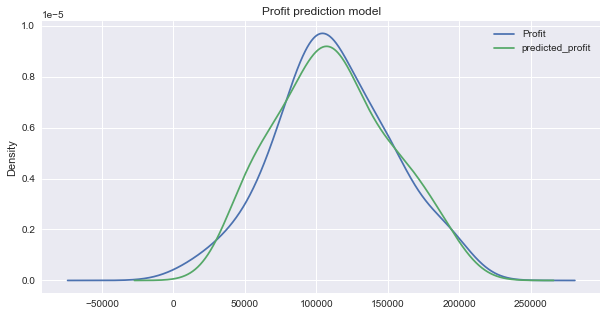

In [23]:
df[['Profit','predicted_profit']].plot(kind='kde',figsize=(10,5),title='Profit prediction model')
plt.show()

In [24]:
model_dict ={
    'state_encoder':state_enc,
    'scaler': scalerX,
    'model' : reg,
    'description' : "startup profit prediction"
}

save_path = '../models/startup_profit_linear.pk'

In [25]:
from templates import save_model

In [26]:
save_model(model_dict, save_path)

True

### 